# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []
api_key =""

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bontang
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | soio
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | greymouth
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | howard springs
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | roswell
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                  bontang   0.1333  117.5000     25.86        89         100   
1                grytviken -54.2811  -36.5092     -0.27        71          11   
2                   avarua -21.2078 -159.7750     28.03        74          75   
3                 thompson  55.7435  -97.8558     21.09        28          75   
4        port-aux-francais -49.3500   70.2167      6.34        95         100   
..                     ...      ...       ...       ...       ...         ...   
575                  jilib   0.4883   42.7854     23.96        91          49   
576          visakhapatnam  17.6900   83.2093     27.94       100          20   
577                uyskoye  54.3775   60.0047      0.67        57          29   
578  san clemente del tuyu -36.3569  -56.7235     15.38        66          83   
579                 tafuna -14.3358 -170.7200     28.03        79          29   

     Wind Speed Country    

In [6]:

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bontang,0.1333,117.5000,25.86,89,100,1.92,ID,1683590348
1,grytviken,-54.2811,-36.5092,-0.27,71,11,3.07,GS,1683590387
2,avarua,-21.2078,-159.7750,28.03,74,75,6.17,CK,1683590388
3,thompson,55.7435,-97.8558,21.09,28,75,3.09,CA,1683590388
4,port-aux-francais,-49.3500,70.2167,6.34,95,100,19.75,TF,1683590305


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bontang,0.1333,117.5000,25.86,89,100,1.92,ID,1683590348
1,grytviken,-54.2811,-36.5092,-0.27,71,11,3.07,GS,1683590387
2,avarua,-21.2078,-159.7750,28.03,74,75,6.17,CK,1683590388
3,thompson,55.7435,-97.8558,21.09,28,75,3.09,CA,1683590388
4,port-aux-francais,-49.3500,70.2167,6.34,95,100,19.75,TF,1683590305


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

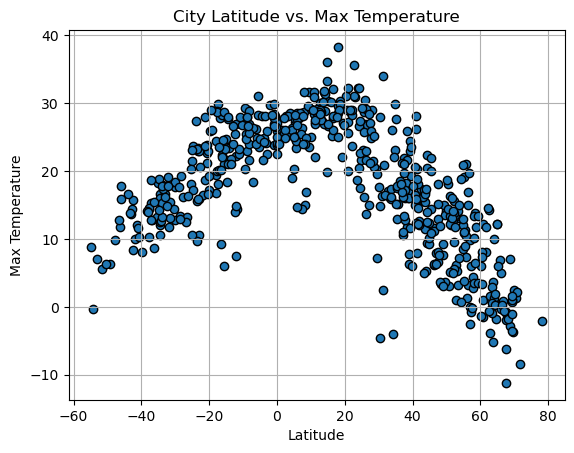

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

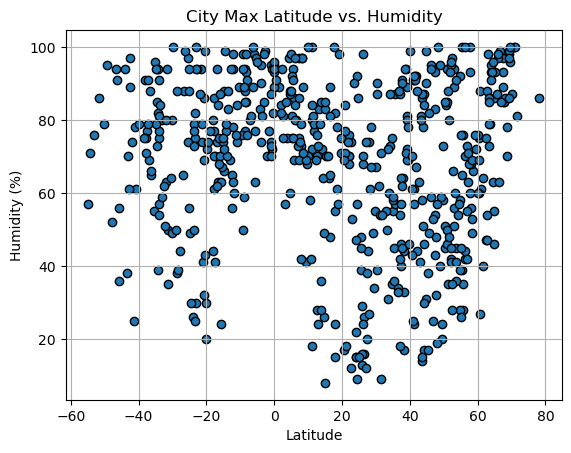

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

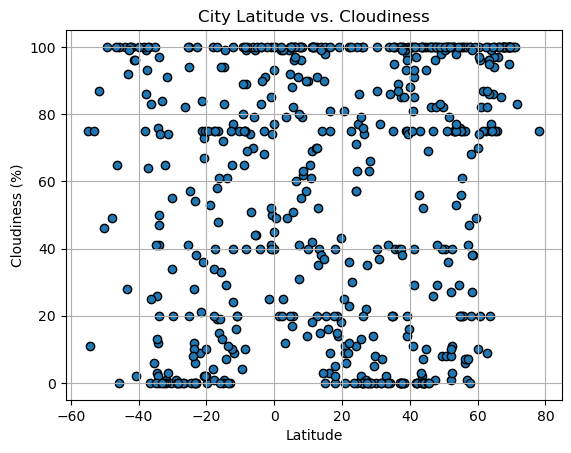

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

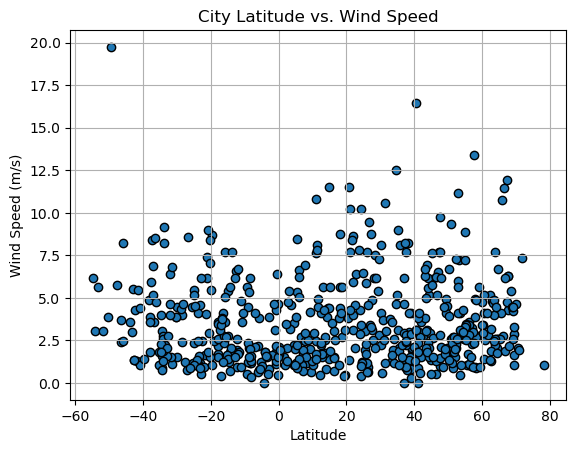

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, std_err) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y =' +str(round(slope,2))+'x + '+str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction',fontsize = 15,color="red")
    print(f'The r-value is:{rvalue**2}')

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bontang,0.1333,117.5000,25.86,89,100,1.92,ID,1683590348
3,thompson,55.7435,-97.8558,21.09,28,75,3.09,CA,1683590388
5,vorgashor,67.5833,63.9500,-1.97,97,100,4.31,RU,1683590388
8,iqaluit,63.7506,-68.5145,-5.15,79,20,7.72,CA,1683590389
12,cabo san lucas,22.8909,-109.9124,30.90,53,30,6.39,MX,1683590390


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-0.27,71,11,3.07,GS,1683590387
2,avarua,-21.2078,-159.7750,28.03,74,75,6.17,CK,1683590388
4,port-aux-francais,-49.3500,70.2167,6.34,95,100,19.75,TF,1683590305
6,rocha,-34.4833,-54.3333,12.12,85,3,3.06,UY,1683590388
7,soio,-6.1349,12.3689,26.22,89,70,2.19,AO,1683590389


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.6870358678287484


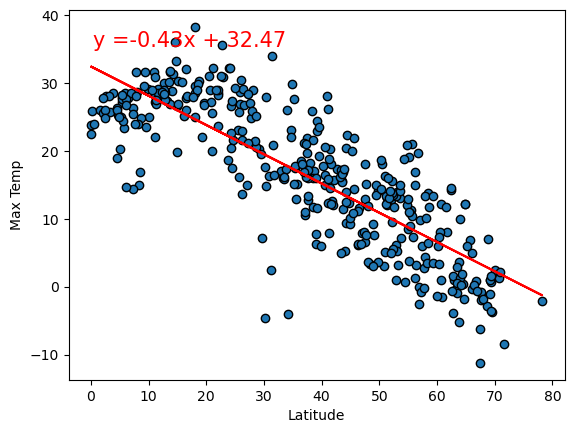

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values)
plt.show() 

The r-value is:0.6082991738333191


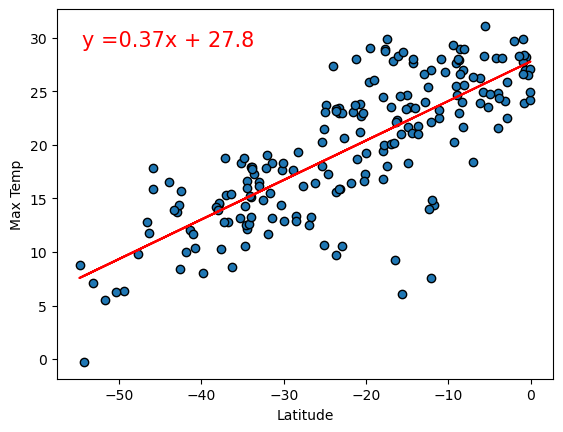

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values)
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, there is a strong negative correlation between the latitude and max temperature. As the latitude increases, the max temperature decreases. Conversely, for the southern hemisphere, there is a strong positive correlation between the latitude and temperature. As the latitude increases, the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.0013891722417392074


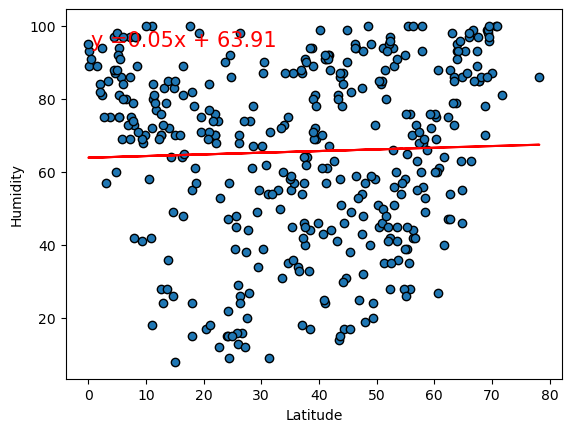

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values)
plt.show() 

The r-value is:0.04276478250490496


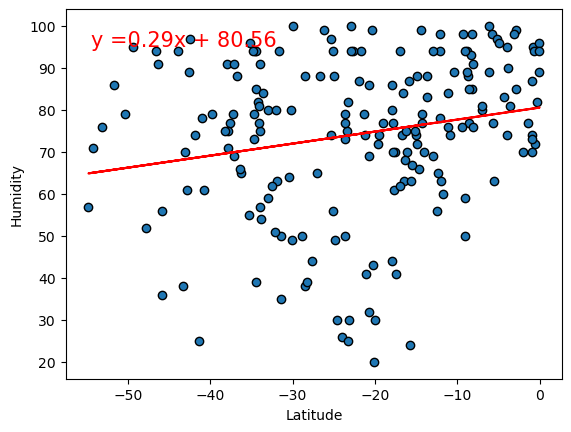

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values)
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemispheres, there's weak to no relationship between latitude and humidity. In order words, latitude and humidity are not correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.027428877444251043


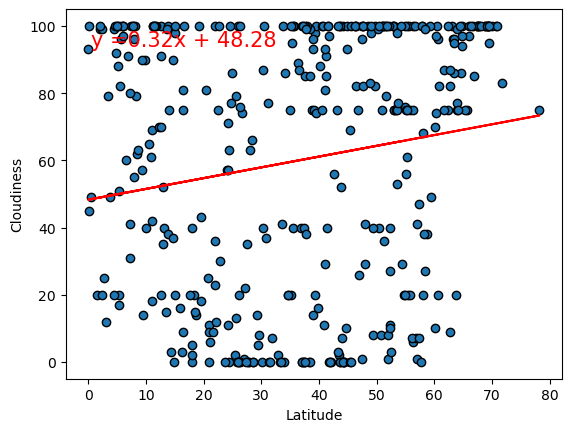

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values)
plt.show() 

The r-value is:0.0009049951147464844


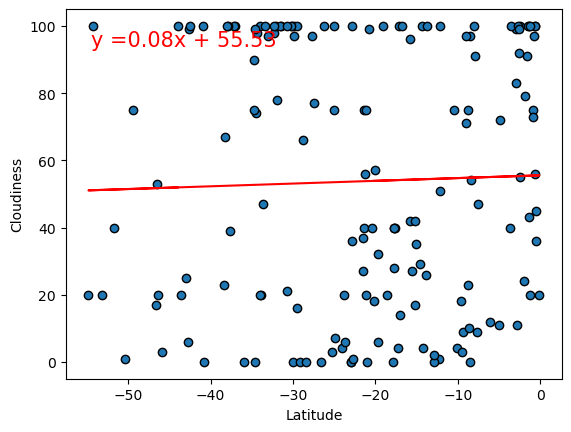

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values)
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemispheres, there's weak to no relationship between latitude and cloudiness. In order words, latitude and wind speeds are not correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.030648598820468023


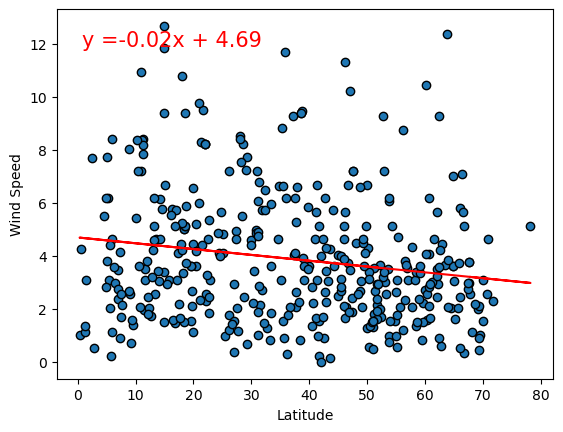

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values)
plt.show() 

The r-value is:0.0690295634165186


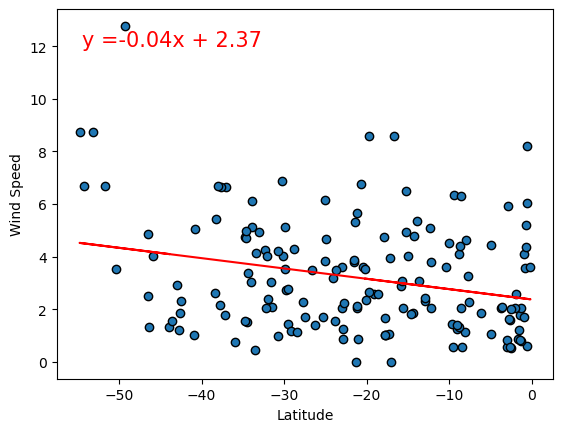

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values)
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemispheres, there's weak to no relationship between latitude and wind speed. In order words, latitude and wind speeds are not correlated. 